In [1]:
import pandas as pd

def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = '/home/nerton/TRABALHO/Projects/kaggle'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path

# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)


Pré-processamento dos Dados

No processo de preparação dos dados para análise, uma das etapas realizadas foi a transformação de variáveis quantitativas em qualitativas por meio da construção de intervalos. Especificamente, a variável idade, originalmente representada por valores numéricos contínuos, foi convertida em uma variável categórica denominada Faixa_Idade.

Para isso, foram definidos intervalos fechados que representam diferentes grupos etários, como: menores de 18 anos, 18 a 25 anos, 26 a 35 anos, e assim por diante. A função pd.cut() da biblioteca pandas foi utilizada para categorizar os valores de idade com base nesses intervalos predefinidos. O parâmetro right=False foi adotado para garantir que o limite inferior de cada faixa seja incluído, enquanto o superior é excluído, evitando sobreposição de faixas.

Além da variável idade, outras variáveis originalmente textuais também foram padronizadas e mantidas como categorias para facilitar a modelagem probabilística. São elas:

    ('P1_b ', 'Genero') – Representando o gênero dos respondentes;
    ('P1_m ', 'Área de Formação') – Indicando a área de formação acadêmica;
    ('P2_r ', 'Atualmente qual a sua forma de trabalho?') – Informando se o profissional atua de forma presencial, híbrida ou remota;
    ('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?') – Indicando se há uso de modelos de linguagem no ambiente de trabalho.

Todas essas variáveis foram tratadas como categóricas nominais, o que possibilita sua utilização em modelos como Redes Bayesianas, que operam com variáveis discretas. Esse pré-processamento foi fundamental para garantir a consistência dos dados e permitir uma análise mais interpretável dos fatores que influenciam a faixa salarial no setor de dados no Brasil.

/tmp/ipykernel_515896/3914342722.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


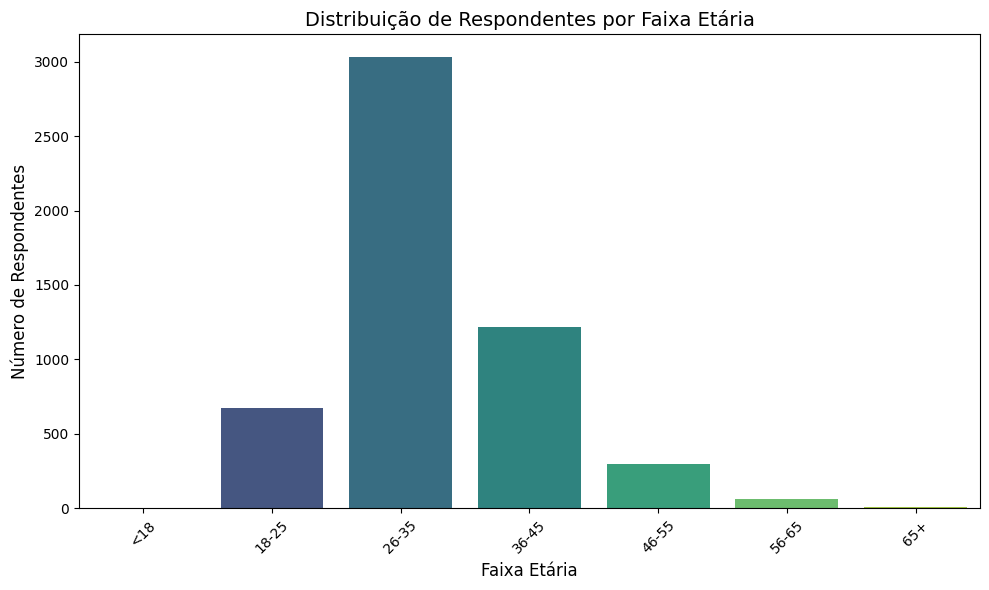

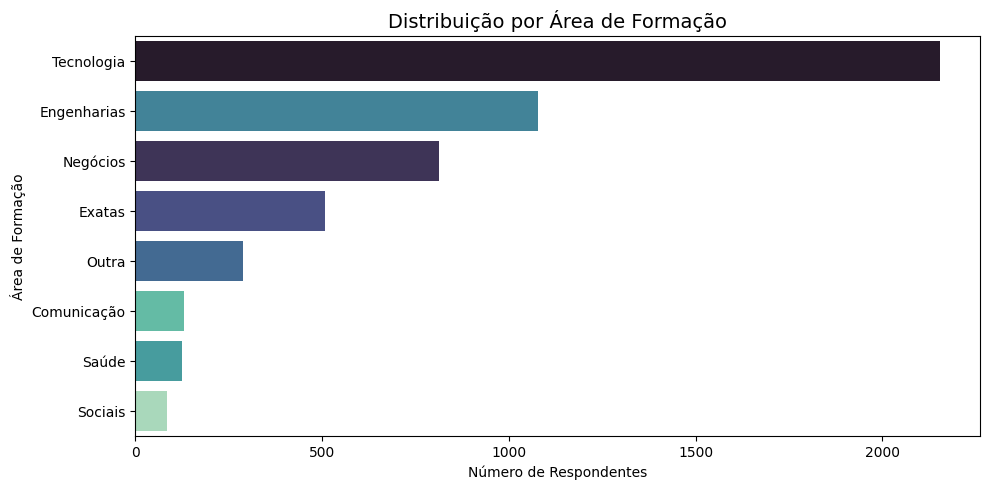

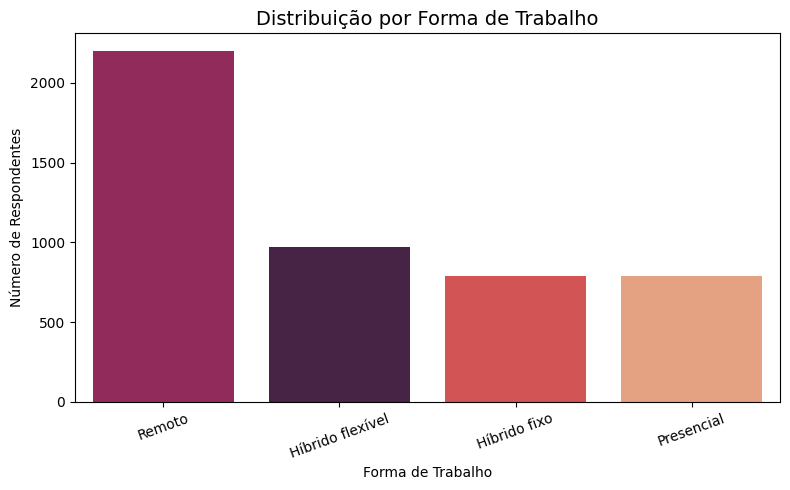

/tmp/ipykernel_515896/3914342722.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


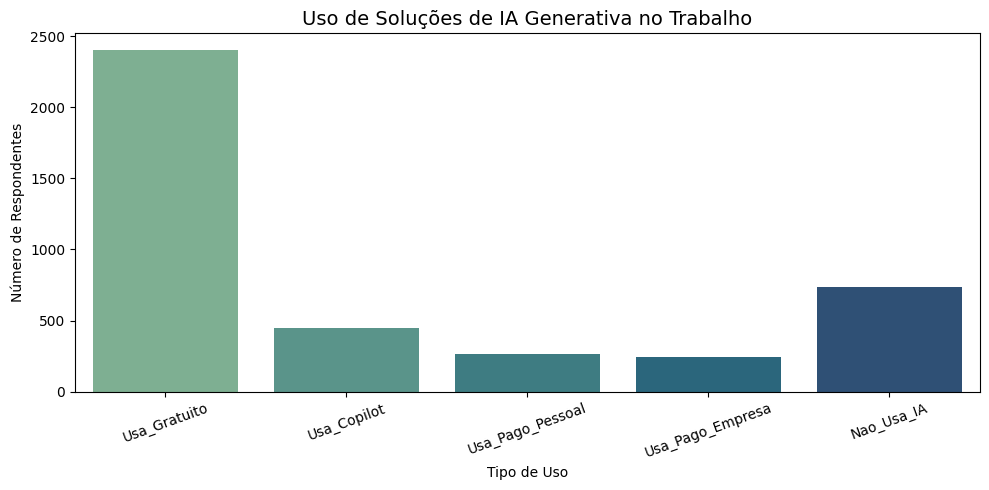

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# CATEGORIZAÇÕES E AGRUPAMENTOS
# =======================


# Faixa etária
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["Faixa_Idade"] = pd.cut(df["('P1_a ', 'Idade')"], bins=bins, labels=labels, right=False)

# Mapeamento de Área de Formação
formacao_map = {
    'Computação / Engenharia de Software / Sistemas de Informação/ TI': 'Tecnologia',
    'Outras Engenharias': 'Engenharias',
    'Economia/ Administração / Contabilidade / Finanças/ Negócios': 'Negócios',
    'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais': 'Exatas',
    'Química / Física': 'Exatas',
    'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde': 'Saúde',
    'Marketing / Publicidade / Comunicação / Jornalismo': 'Comunicação',
    'Ciências Sociais': 'Sociais',
    'Outra opção': 'Outra',
    'nan': 'Não informado'
}

# Mapeamento de Forma de Trabalho
trabalho_map = {
    'Modelo 100% presencial': 'Presencial',
    'Modelo 100% remoto': 'Remoto',
    'Modelo híbrido com dias fixos de trabalho presencial': 'Híbrido fixo',
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Híbrido flexível',
    'nan': 'Não informado'
}

# Aplicar mapeamentos
df["Formacao_Categorizada"] = df[("('P1_m ', 'Área de Formação')")].map(formacao_map)
df["Forma_Trabalho_Categorizada"] = df[("('P2_r ', 'Atualmente qual a sua forma de trabalho?')")].map(trabalho_map)


# =======================
# USO DE IA GENERATIVA NO TRABALHO
# =======================

# Preencher valores nulos
col_ia = "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')"
df[col_ia] = df[col_ia].fillna("")

# Criar colunas binárias
df["Usa_Gratuito"] = df[col_ia].str.contains("gratuitas", case=False)
df["Usa_Copilot"] = df[col_ia].str.contains("Copilot", case=False)
df["Usa_Pago_Pessoal"] = df[col_ia].str.contains("pago do meu próprio bolso", case=False)
df["Usa_Pago_Empresa"] = df[col_ia].str.contains("empresa em que trabalho paga", case=False)
df["Nao_Usa_IA"] = df[col_ia].str.startswith("Não utilizo", na=False)

# Contar os usos
uso_llms = df[["Usa_Gratuito", "Usa_Copilot", "Usa_Pago_Pessoal", "Usa_Pago_Empresa", "Nao_Usa_IA"]].sum()

# =======================
# GRÁFICOS
# =======================

# Gráfico: Faixa Etária
plt.figure(figsize=(10, 6))
# Transformar em DataFrame
# Calcular a contagem de valores para a coluna "Faixa_Idade"
faixa_etaria_counts = df["Faixa_Idade"].value_counts()

faixa_etaria_df = faixa_etaria_counts.reset_index()
faixa_etaria_df.columns = ["Faixa_Idade", "Contagem"]

sns.barplot(
    data=faixa_etaria_df,
    x="Faixa_Idade",
    y="Contagem",
    palette="viridis"
)

plt.title("Distribuição de Respondentes por Faixa Etária", fontsize=14)
plt.xlabel("Faixa Etária", fontsize=12)
plt.ylabel("Número de Respondentes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico: Área de Formação
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    y="Formacao_Categorizada",
    hue="Formacao_Categorizada",
    order=df["Formacao_Categorizada"].value_counts().index,
    palette="mako",
    legend=False
)
plt.title("Distribuição por Área de Formação", fontsize=14)
plt.xlabel("Número de Respondentes")
plt.ylabel("Área de Formação")
plt.tight_layout()
plt.show()


# Gráfico: Forma de Trabalho
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="Forma_Trabalho_Categorizada",
    hue="Forma_Trabalho_Categorizada",
    order=df["Forma_Trabalho_Categorizada"].value_counts().index,
    palette="rocket",
    legend=False
)
plt.title("Distribuição por Forma de Trabalho", fontsize=14)
plt.xlabel("Forma de Trabalho")
plt.ylabel("Número de Respondentes")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


# Gráfico: Uso de IA Generativa
plt.figure(figsize=(10, 5))

# Transformar em DataFrame
uso_llms_df = uso_llms.reset_index()
uso_llms_df.columns = ["Tipo_Uso", "Contagem"]

sns.barplot(
    data=uso_llms_df,
    x="Tipo_Uso",
    y="Contagem",
    palette="crest"
)

plt.title("Uso de Soluções de IA Generativa no Trabalho", fontsize=14)
plt.xlabel("Tipo de Uso")
plt.ylabel("Número de Respondentes")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



In [3]:
from sklearn.preprocessing import LabelEncoder

# Usar o DataFrame df já carregado
df_encoded = df.copy()
encoders = {}

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

Para representar graficamente as relações probabilísticas entre as variáveis do estudo, foi elaborado o grafo da Rede Bayesiana com base em variáveis extraídas do conjunto de dados "State of Data BR 2023". O objetivo central foi compreender como fatores como idade, gênero, área de formação, forma de trabalho e o uso de LLMs (como o ChatGPT) podem influenciar a faixa salarial dos profissionais de dados no Brasil.

As variáveis consideradas foram:
    Faixa etária (a partir da categorização da idade),
    Gênero,
    Área de formação,
    Forma de trabalho (presencial, híbrido ou remoto),
    Uso de LLMs no trabalho,
    Faixa salarial (variável alvo da rede).

A estrutura da rede foi definida de forma dirigida, assumindo que as variáveis demográficas e profissionais exercem influência sobre a faixa salarial. Dessa forma, as arestas foram direcionadas das variáveis explicativas para a variável dependente "Faixa Salarial". O grafo resultante é um grafo acíclico direcionado (DAG), onde cada variável está representada por um nó, e as setas indicam relações de dependência condicional.

O esboço do grafo permite uma visualização clara das hipóteses iniciais sobre os relacionamentos entre as variáveis, além de ser a base para a construção do modelo probabilístico usado nas etapas seguintes.

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


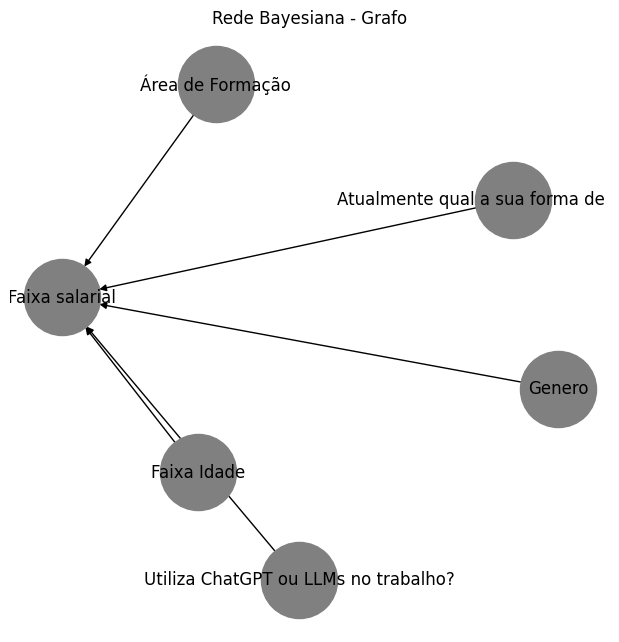

In [4]:
from pgmpy.models import DiscreteBayesianNetwork
import networkx as nx

# Exemplo de grafo: todas apontam para faixa salarial
graph = DiscreteBayesianNetwork([
    ("Faixa Idade", "Faixa salarial"),
    ("Genero", "Faixa salarial"),
    ("Área de Formação", "Faixa salarial"),
    ("Atualmente qual a sua forma de trabalho?", "Faixa salarial"),
    ("Utiliza ChatGPT ou LLMs no trabalho?", "Faixa salarial")
])
# Adicionando as arestas ao grafo
grafo = nx.DiGraph()
edges = graph.edges()
grafo.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(grafo, with_labels = True, node_color = 'grey', edge_color = 'black', node_size = 3000, font_size = 12)
plt.title("Rede Bayesiana - Grafo")
plt.show()




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import DiscreteBayesianNetwork  # Classe atualizada
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

# =======================
# PREPARAÇÃO DOS DADOS
# =======================
df["Usa_Gratuito"] = df[col_ia].str.contains("gratuitas", case=False)
df["Usa_Copilot"] = df[col_ia].str.contains("Copilot", case=False)
df["Usa_Pago_Pessoal"] = df[col_ia].str.contains("pago do meu próprio bolso", case=False)
df["Usa_Pago_Empresa"] = df[col_ia].str.contains("empresa em que trabalho paga", case=False)
df["Nao_Usa_IA"] = df[col_ia].str.startswith("Não utilizo", na=False)

# Selecionar colunas do DataFrame
dados_rede = df[[
    "Faixa_Idade",
    "('P1_b ', 'Genero')",
    "Formacao_Categorizada",
    "Forma_Trabalho_Categorizada",
    "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')",
    "Usa_Gratuito",
    "Usa_Copilot",
    "Usa_Pago_Pessoal",
    "Usa_Pago_Empresa",
    "Nao_Usa_IA",
    "('P1_c ', 'Cor/raca/etnia')",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
    "('P2_h ', 'Faixa salarial')",
    "('P4_d_3 ', 'Python')",
    "('P4_d_4 ', 'C/C++/C#')",
    "('P4_d_5 ', '.NET')",
    "('P4_d_6 ', 'Java')",
    "('P4_d_7 ', 'Julia')",
    "('P4_d_8 ', 'SAS/Stata')",
    "('P4_d_9 ', 'Visual Basic/VBA')",
    "('P4_d_10 ', 'Scala')",
    "('P4_d_11 ', 'Matlab')",
    "('P4_d_12 ', 'Rust')",
    "('P4_d_13 ', 'PHP')",
    "('P4_d_14 ', 'JavaScript')",
    "('P4_d_15 ', 'Não utilizo nenhuma linguagem')"
]].copy()

# Renomear colunas
dados_rede.columns = [
    "Faixa Idade",
    "Gênero",
    "Área de Formação",
    "Forma de Trabalho",
    "Uso IA",
    "Usa Gratuito",
    "Usa Copilot",
    "Usa Pago Pessoal",
    "Usa Pago Empresa",
    "Não Usa IA",
    "Cor/Raça/Etnia",
    "Tempo de Experiência",
    "Faixa Salarial",
    "Python",
    "C/C++/C#",
    ".NET",
    "Java",
    "Julia",
    "SAS/Stata",
    "Visual Basic/VBA",
    "Scala",
    "Matlab",
    "Rust",
    "PHP",
    "JavaScript",
    "Não Utiliza Linguagem"
]

# Tratar valores nulos e categorizar uso de IA
dados_rede["Uso IA"] = dados_rede["Uso IA"].fillna("Não utilizo")
dados_rede["Usa IA"] = dados_rede["Uso IA"].str.startswith("Não utilizo")
dados_rede = dados_rede.drop(columns=["Uso IA"])

# Remover linhas com valores faltantes
dados_rede = dados_rede.dropna()

# =======================
# CONSTRUÇÃO DA REDE BAYESIANA
# =======================

# Definir estrutura da rede (usando DiscreteBayesianNetwork)
# Definir uma estrutura simplificada da rede
model = DiscreteBayesianNetwork([
    ("Faixa Idade", "Faixa Salarial"),
    ("Gênero", "Faixa Salarial"),
    ("Área de Formação", "Faixa Salarial"),
    ("Forma de Trabalho", "Faixa Salarial"),
    ("Tempo de Experiência", "Faixa Salarial")
])

# Ajuste com estimador bayesiano
model.fit(
    dados_rede,
    estimator=BayesianEstimator,
    prior_type="dirichlet",
    pseudo_counts=1
)


# =======================
# ANÁLISE DOS RESULTADOS
# =======================
# 1. Obter e mostrar CPDs
print("\nDistribuições Condicionais:\n")
for node in model.nodes():
    cpd = model.get_cpds(node)
    print(f"Variável: {node}")
    print(cpd, "\n")

infer = VariableElimination(model)
dados_rede.tail(100)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Faixa Idade': 'O', 'Gênero': 'C', 'Área de Formação': 'C', 'Forma de Trabalho': 'C', 'Usa Gratuito': 'N', 'Usa Copilot': 'N', 'Usa Pago Pessoal': 'N', 'Usa Pago Empresa': 'N', 'Não Usa IA': 'N', 'Cor/Raça/Etnia': 'C', 'Tempo de Experiência': 'C', 'Faixa Salarial': 'C', 'Python': 'N', 'C/C++/C#': 'N', '.NET': 'N', 'Java': 'N', 'Julia': 'N', 'SAS/Stata': 'N', 'Visual Basic/VBA': 'N', 'Scala': 'N', 'Matlab': 'N', 'Rust': 'N', 'PHP': 'N', 'JavaScript': 'N', 'Não Utiliza Linguagem': 'N', 'Usa IA': 'N'}



Distribuições Condicionais:

Variável: Faixa Idade
+--------------------+------------+
| Faixa Idade(18-25) | 0.141316   |
+--------------------+------------+
| Faixa Idade(26-35) | 0.613808   |
+--------------------+------------+
| Faixa Idade(36-45) | 0.201187   |
+--------------------+------------+
| Faixa Idade(46-55) | 0.0350593  |
+--------------------+------------+
| Faixa Idade(56-65) | 0.00728155 |
+--------------------+------------+
| Faixa Idade(65+)   | 0.00134844 |
+--------------------+------------+ 

Variável: Faixa Salarial
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+ 

Variável: Gênero
+------------------------------+------------+
| Gênero(Feminino)             | 0.247706   |
+-----------------------------

,Faixa Idade,Gênero,Área de Formação,Forma de Trabalho,Usa Gratuito,Usa Copilot,Usa Pago Pessoal,Usa Pago Empresa,Não Usa IA,Cor/Raça/Etnia,...,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,Rust,PHP,JavaScript,Não Utiliza Linguagem,Usa IA
5145,26-35,Masculino,Tecnologia,Presencial,True,False,False,False,False,Parda,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
5147,18-25,Masculino,Tecnologia,Remoto,True,False,False,True,False,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
5148,26-35,Feminino,Engenharias,Híbrido flexível,True,False,False,False,False,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5150,36-45,Masculino,Tecnologia,Híbrido fixo,True,False,False,False,False,Preta,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
5153,36-45,Feminino,Exatas,Híbrido fixo,False,False,False,False,True,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,26-35,Feminino,Engenharias,Remoto,True,False,False,False,False,Parda,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5286,36-45,Masculino,Tecnologia,Remoto,False,False,True,False,False,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5287,26-35,Masculino,Exatas,Híbrido flexível,False,True,True,False,False,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5289,26-35,Masculino,Engenharias,Remoto,False,True,False,True,False,Branca,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


A Rede Bayesiana foi construída utilizando o pacote pgmpy, com inferência de tipos de variáveis e aprendizado de distribuições condicionais diretamente dos dados. As variáveis foram majoritariamente tratadas como numéricas discretas, com exceção da "Faixa Idade", inferida como categórica ordenada, dada sua natureza sequencial.

As variáveis modeladas incluem:

    Demográficas: Faixa Idade, Gênero, Área de Formação

    Profissionais: Forma de Trabalho

    Tecnológicas: Usa IA, Usa Gratuito, Usa Copilot, Usa Pago Pessoal, Usa Pago Empresa, Não Usa IA

    Resultado: Faixa Salarial (variável alvo)


2.1. Perfil Etário

A distribuição etária dos profissionais revela uma predominância significativa das faixas entre 26 e 35 anos (58,7%), seguida da faixa 36 a 45 anos (23,0%). As faixas mais jovens (18 a 25 anos) representam 11,8%, e há uma presença marginal de profissionais acima dos 55 anos. Esse padrão é compatível com um mercado de trabalho tecnológico jovem e dinâmico, onde profissionais iniciam carreiras cedo e buscam rápida progressão.
2.2. Gênero

A amostra apresenta uma composição majoritariamente masculina (75,9%), com mulheres representando cerca de 23,5% dos participantes. Gêneros não-binários ou outros somam menos de 1%. Tal distribuição evidencia um desequilíbrio de gênero ainda presente na área de tecnologia, o que pode impactar as análises salariais e as políticas de inclusão.
2.3. Área de Formação

A variável "Área de Formação" mostra concentração na categoria codificada como (7), que representa 41,2% da amostra. Apesar da ausência de rótulos explícitos, é provável que esta categoria corresponda a formações em tecnologia da informação, ciência de dados ou áreas correlatas, dada a natureza da pesquisa.
2.4. Forma de Trabalho

A forma de trabalho remota ou híbrida (codificada como categoria 3) é a mais comum, abrangendo 46,2% dos respondentes. Essa tendência é coerente com o contexto pós-pandemia e com a crescente digitalização dos ambientes corporativos. Modalidades presenciais ou outras formas menos comuns têm menor representatividade.
2.5. Uso de Inteligência Artificial

O uso de IA ainda é restrito a uma minoria (15,5%), com a maior parte dos profissionais (84,5%) não utilizando ferramentas desse tipo. Entre os que utilizam, o acesso gratuito é o mais frequente (50,4%), sendo que ferramentas pagas — tanto pessoais quanto fornecidas por empresas — são menos usuais (aproximadamente 5% cada). O uso do GitHub Copilot também é baixo, com apenas 9,3% dos respondentes afirmando utilizá-lo. Esses dados sugerem que a adoção de IA ainda está em estágios iniciais, apesar da ampla discussão sobre o tema.

In [8]:
from pgmpy.inference import VariableElimination

# Supondo que você tenha um modelo já treinado chamado `modelo`
inferencia = VariableElimination(model)

# Vamos prever a 'Faixa Salarial' para as 5 últimas amostras
teste = dados_rede.sample(n=5)

# Lista para armazenar resultados
predicoes = []

# Iterar sobre as amostras para realizar inferências
for index, row in teste.iterrows():
    dados_inferencia = {
        "Faixa Idade": row["Faixa Idade"],
        "Gênero": row["Gênero"],
        "Área de Formação": row["Área de Formação"],
        "Forma de Trabalho": row["Forma de Trabalho"],
    }

    # Realizar a inferência para a variável "Faixa Salarial"
    predicao = inferencia.query(variables=["Faixa Salarial"], evidence=dados_inferencia)
    predicoes.append((predicao, row["Faixa Salarial"]))  # Adicionar predição e valor real

    for i, (pred, real) in enumerate(predicoes):
        print(f"Predição {i+1}:")
        print(pred)
        print(f"Valor real: {real}")


Predição 1:
+--------------------------------------------------+-----------------------+
| Faixa Salarial                                   |   phi(Faixa Salarial) |
+==================================================+=======================+
| Faixa Salarial(Acima de R$ 40.001/mês)           |                0.0615 |
+--------------------------------------------------+-----------------------+
| Faixa Salarial(Menos de R$ 1.000/mês)            |                0.0615 |
+--------------------------------------------------+-----------------------+
| Faixa Salarial(de R$ 1.001/mês a R$ 2.000/mês)   |                0.0615 |
+--------------------------------------------------+-----------------------+
| Faixa Salarial(de R$ 101/mês a R$ 2.000/mês)     |                0.0615 |
+--------------------------------------------------+-----------------------+
| Faixa Salarial(de R$ 12.001/mês a R$ 16.000/mês) |                0.0615 |
+--------------------------------------------------+------------

In [ ]:
# Exemplo de inferência (usando códigos categóricos)
try:
    result = infer.query(
        variables=["Faixa Salarial"],
        evidence={
            "Gênero": 1,  # Substituir pelo código correspondente
            "Área de Formação": 2,  # Substituir pelo código correspondente
            "Forma de Trabalho": 3,  # Substituir pelo código correspondente
            "Usa IA": 1  # 1 para True, 0 para False
        }
    )
    print("\nResultado da inferência:")
    print(result)
except Exception as e:
    print(f"\nErro na inferência: {e}")
    print("Verifique os códigos categóricos das suas variáveis")

# 4. Mostrar mapeamento de códigos categóricos
print("\nMapeamento de códigos categóricos:")
for col in dados_rede.columns:
    if col in ["Faixa Idade", "Gênero", "Área de Formação", "Forma de Trabalho", "Usa IA", "Faixa Salarial"]:
        print(f"\n{col}:")
        if dados_rede[col].dtype == 'int8':
            categories = pd.Categorical.from_codes(
                range(len(dados_rede[col].unique())),
                categories=dados_rede[col].astype('category').cat.categories
            )
            for code, cat in enumerate(categories):
                print(f"  {code}: {cat}")


Erro na inferência: "state: 2 is an unknown for variable: Área de Formação. It must be one of ['Comunicação', 'Engenharias', 'Exatas', 'Negócios', 'Outra', 'Saúde', 'Sociais', 'Tecnologia']"
Verifique os códigos categóricos das suas variáveis

Mapeamento de códigos categóricos:

Faixa Idade:

Gênero:

Área de Formação:

Forma de Trabalho:

Faixa Salarial:

Usa IA:


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Função para calcular a correlação de Cramér
def cramers_v(var1, var2):
    try:
        tabela_contingencia = pd.crosstab(var1, var2)
        chi2, _, _, _ = chi2_contingency(tabela_contingencia)
        n = tabela_contingencia.sum().sum()
        r, k = tabela_contingencia.shape
        cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
        return cramers_v
    except Exception as e:
        print(f"Erro ao calcular Cramér: {e}")
        return np.nan

# =======================
# TRATAMENTO DE DADOS
# =======================

# Adicionar "Não informado" como categoria válida para colunas categóricas
for coluna in df.columns:
    if df[coluna].dtype.name == "category":
        df[coluna] = df[coluna].cat.add_categories("Não informado")

# Preencher valores nulos com "Não informado"
df = df.fillna("Não informado")

# Converter todas as colunas para categóricas (caso ainda não sejam)
for coluna in df.columns:
    if df[coluna].dtype != "category":
        df[coluna] = df[coluna].astype("category")

# =======================
# CÁLCULO DA CORRELAÇÃO DE CRAMÉR
# =======================

# Nome da variável alvo
variavel_alvo = "('P2_h ', 'Faixa salarial')"
resultados_cramer = {}

# Calcular a correlação de Cramér para todas as variáveis
for coluna in df.columns:
    if coluna != variavel_alvo:  # Ignorar a variável alvo
        try:
            correlacao = cramers_v(df[coluna], df[variavel_alvo])
            resultados_cramer[coluna] = correlacao
        except Exception as e:
            print(f"Erro ao calcular Cramér para {coluna}: {e}")

# Exibir os resultados ordenados pela força da correlação
resultados_ordenados = sorted(resultados_cramer.items(), key=lambda x: x[1], reverse=True)

print("\nCorrelação de Cramér com 'Faixa Salarial':")
print("+-------------------------------+----------------+")
print("| Variável                      | Correlação     |")
print("+-------------------------------+----------------+")
for var, corr in resultados_ordenados:
    print(f"| {var:<30} | {corr:.4f}         |")
print("+-------------------------------+----------------+")

TypeError: Cannot setitem on a Categorical with a new category (Não informado), set the categories first